<a href="https://colab.research.google.com/github/MiriamSanta/MiriamSanta/blob/main/examen23_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Examen software statistic

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cars = pd.read_csv("CARS.csv")
#eu am adăugat fisierul csv prin interfață ca să-mi funcționeze. Nu știu cum să iau calea din drive sau cum altfel să fac.

1.Creează o listă cu numerele pare de la 2 la 10 (inclusiv), folosind range(). Afișează această listă invers, din 2 în 2 pași.

In [13]:
print(list(range(10, 1, -2)))

[10, 8, 6, 4, 2]


2. Calculează pătratul valorii Horsepower pentru a doua mașină din setul de date cars.

In [14]:
print(cars.loc[1, "Horsepower"] ** 2)

40000


3. Creează o funcție care primește o valoare numerică și returnează "puternic" dacă este peste 200, altfel "normal". Aplic-o asupra primelor 5 valori din Horsepower și afișează rezultatele.

In [23]:
cars.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [15]:
def putere(x): return "puternic" if x > 200 else "normal"
print(list(map(putere, cars["Horsepower"].head(5))))

['puternic', 'normal', 'normal', 'puternic', 'puternic']


4.Extrage primele 6 valori din coloana DriveTrain. Afișează doar acele valori care sunt egale cu valoarea de pe prima poziție (index 0) din acea coloană.

In [16]:
dt = cars["DriveTrain"].head(6)
print(dt[dt == dt.iloc[0]])

0    All
Name: DriveTrain, dtype: object


5. Afișează de câte ori apare fiecare valoare din coloana Origin. Afișează și proporția fiecărei valori, în procente, rotunjită la 3 zecimale.

In [17]:
origin_freq = cars["Origin"].value_counts(normalize=True).round(3) * 100
print(cars["Origin"].value_counts())
print(origin_freq)

Origin
Asia      158
USA       147
Europe    123
Name: count, dtype: int64
Origin
Asia      36.9
USA       34.3
Europe    28.7
Name: proportion, dtype: float64


6. Creează două histograme suprapuse verticale care arată distribuția variabilei Horsepower:
 1.prima histograma sa aiba 8 bare
 2. a doua histograma sa aiba 25 bare

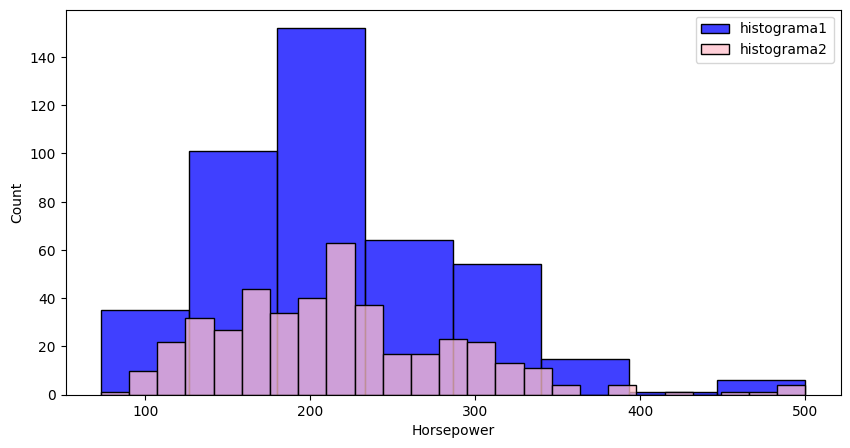

In [25]:
plt.figure(figsize=(10,5))
sns.histplot(cars["Horsepower"], bins=8, color="blue", label="histograma1")
sns.histplot(cars["Horsepower"], bins=25, color="pink", label="histograma2")
plt.legend()
plt.show()

7. Afișează un boxplot vertical pentru variabila Horsepower. Activează opțiunea de afișare a mediei pe grafic. Apoi:

1.Calculează media și mediana acestei variabile;

2.Spune care este mai mare și explică ce indică acest lucru despre forma distribuției;

3.Identifică dacă există valori extreme (outlieri).

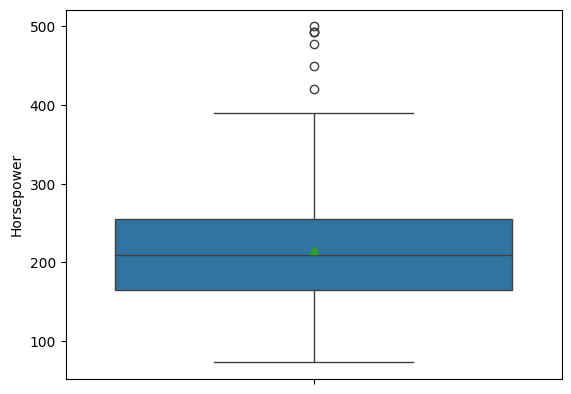

215.8855140186916
210.0
20     450
114    500
262    493
270    493
271    493
334    477
412    420
Name: Horsepower, dtype: int64


In [29]:
sns.boxplot(y=cars["Horsepower"], showmeans=True)
plt.show()

hp = cars["Horsepower"]
print(hp.mean())
print(hp.median())

q1 = hp.quantile(0.25)
q3 = hp.quantile(0.75)
iqr = q3 - q1
outliers = hp[(hp < q1 - 1.5 * iqr) | (hp > q3 + 1.5 * iqr)]
print(outliers)


8. Simulează o matrice de dimensiune 600×10 în care fiecare valoare este o valoare întreagă aleatoare între 150 și 300.

1.Numără de câte ori apare o valoare peste 250 pe fiecare rând;

2.Calculează frecvența relativă a acestor apariții;

3.Afișează media generală a acestor frecvențe.

In [20]:
mat = np.random.randint(150, 301, size=(600, 10))
peste_250 = np.sum(mat > 250, axis=1)
frecv = peste_250 / 10
print(peste_250[:5])
print(frecv[:5])
print(frecv.mean())

[4 6 1 2 2]
[0.4 0.6 0.1 0.2 0.2]
0.321


9. Sortează datele în ordine crescătoare după MPG_Highway. Afișează primele 3 rânduri, doar cu coloanele Make, Model, MPG_Highway.

In [21]:
print(cars.sort_values("MPG_Highway")[["Make", "Model", "MPG_Highway"]].head(3))

              Make              Model  MPG_Highway
166         Hummer                 H2           12
118           Ford  Excursion 6.8 XLT           13
251  Mercedes-Benz               G500           14


10. Identifică cele mai frecvente 10 mărci (Make) din setul de date. Construiește un grafic de tip countplot care:

1.să afișeze aceste mărci pe axa X;

2.să coloreze barele în funcție de DriveTrain;

3.să afișeze o bară pentru fiecare combinație Make–DriveTrain;

4.să păstreze ordinea descrescătoare a frecvențelor pe axa X.

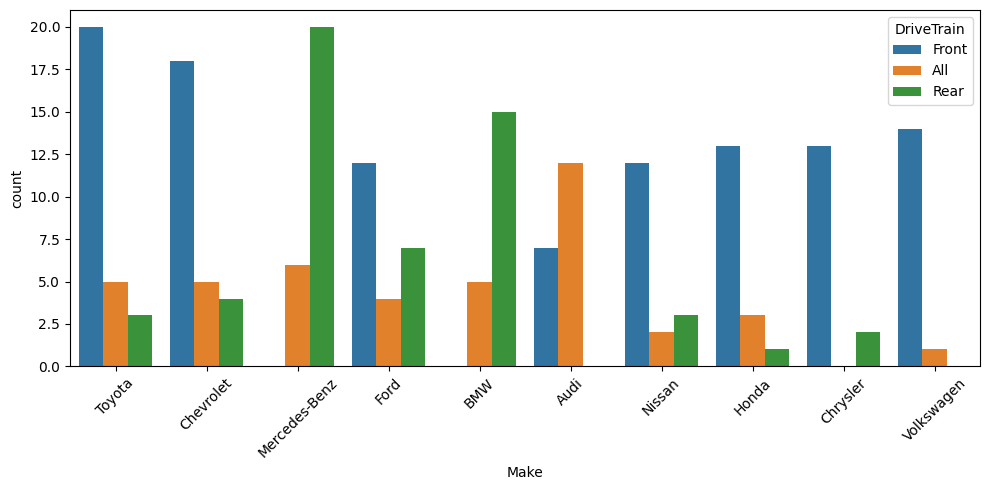

In [22]:
top10 = cars["Make"].value_counts().head(10).index
plt.figure(figsize=(10, 5))
sns.countplot(data=cars[cars["Make"].isin(top10)], x="Make", hue="DriveTrain", order=top10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()